# Linear models for regression


###  a) Data Import:

1. Importing necessary libraries

In [ ]:
import numpy as np  # For numerical operations on large quantities of data
import pandas as pd # For data manipulation and analysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2. Reading the data and storing it into a DataFrame

In [ ]:
df = pd.read_csv("/content/soybean_tabular.csv")

3. Data preview

In [ ]:
df.head()

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
0,1,4.0900,15.3,396.90,4.98,0.00632,18.0,6.575,2.381979,0.475522,65.2,296.350195,24.0
1,2,4.9671,17.8,396.90,9.14,0.02731,0.0,6.421,7.071148,0.509165,78.9,241.620198,21.6
2,2,4.9671,17.8,392.83,4.03,0.02729,0.0,7.185,6.896941,0.580673,61.1,241.551476,34.7
3,3,6.0622,18.7,394.63,2.94,0.03237,0.0,6.998,2.237817,0.491539,45.8,222.023994,33.4
4,3,6.0622,18.7,396.90,5.33,0.06905,0.0,7.147,1.979327,0.103660,54.2,221.723972,36.2


4. Checking the shape of the DataFrame.

In [ ]:
df.shape

(506, 13)

5. Describing the data to get a glance at statistical summary and distribution of values.

In [ ]:
df.describe()

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,9.549407,3.795043,18.455534,356.674032,12.653063,3.613524,11.363636,6.284634,11.131488,0.551258,68.574901,408.252839,22.532806
std,8.707259,2.105710,2.164946,91.294864,7.141062,8.601545,23.322453,0.702617,6.868654,0.181693,28.148861,168.530578,9.197104
min,1.000000,1.129600,12.600000,0.320000,1.730000,0.006320,0.000000,3.561000,0.472905,0.103660,2.900000,186.765075,5.000000
25%,4.000000,2.100175,17.400000,375.377500,6.950000,0.082045,0.000000,5.885500,5.149096,0.422286,45.025000,278.745884,17.025000
50%,5.000000,3.207450,19.050000,391.440000,11.360000,0.256510,0.000000,6.208500,9.588040,0.528133,77.500000,330.467783,21.200000
75%,24.000000,5.188425,20.200000,396.225000,16.955000,3.677082,12.500000,6.623500,18.094315,0.668573,94.075000,665.354401,25.000000
max,24.000000,12.126500,22.000000,396.900000,37.970000,88.976200,100.000000,8.780000,28.074197,1.158538,100.000000,711.210992,50.000000


6. Checking for null or missing values.

In [ ]:
df.isnull().values.any()

False

### b) Data pre-processing

1. visualising distribution of data

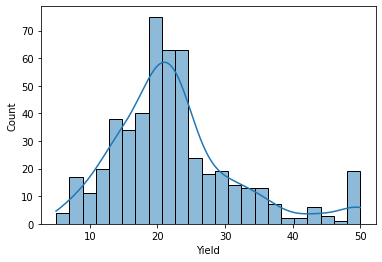

In [ ]:
sns.histplot(data=df, x="Yield", kde=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


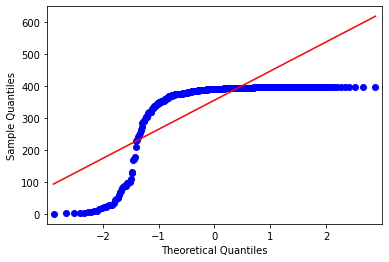

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['S_3'], line='s')
plt.show()

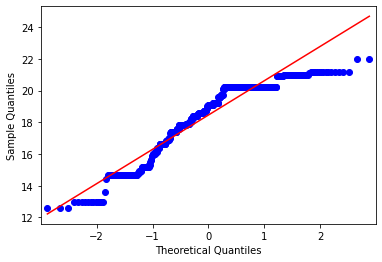

In [ ]:
qqplot(df['S_2'], line='s')
plt.show()

In [ ]:
# Experimented with Standardization
y = df['Yield'] #dependant feature
# axis 1 tells python that you want to apply function on columns
std = StandardScaler()
X = pd.DataFrame(std.fit_transform(df.drop(['Yield'], axis=1))) # independant features,


# # Experimented with Normalization

# y = df['Yield'] #dependant feature
# normalized_df=(df-df.min())/(df.max()-df.min()) # implemented formula for normalization
# X = normalized_df.drop(['Yield'], axis=1) # independant features

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.982843,0.140214,-1.459000,0.441052,-1.075562,-0.419782,0.284830,0.413672,-1.275092,-0.417242,-0.120013,-0.664647
1,-0.867883,0.557160,-0.303094,0.441052,-0.492439,-0.417339,-0.487722,0.194274,-0.591726,-0.231899,0.367166,-0.989717
2,-0.867883,0.557160,-0.303094,0.396427,-1.208727,-0.417342,-0.487722,1.282714,-0.617113,0.162055,-0.265812,-0.990125
3,-0.752922,1.077737,0.113032,0.416163,-1.361517,-0.416750,-0.487722,1.016303,-1.296102,-0.329004,-0.809889,-1.106109
4,-0.752922,1.077737,0.113032,0.441052,-1.026501,-0.412482,-0.487722,1.228577,-1.333772,-2.465920,-0.511180,-1.107891


In [ ]:
# Let us split the data in train, val, test set in 60%, 20%, 20% of the datasets respectively.
# Reference: [3](scikit-learn, 2021)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(303, 12)
(102, 12)
(101, 12)


# c) Linear Regression Training

Ridge Regression

In [ ]:
# Reference: [4](Smith.edu, 2016)
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge=Ridge()
parameters={'alpha':alphas}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 4.055654153948428}
-26.190783928563484


Lasso Regression

In [ ]:
lasso=Lasso()
parameters={'alpha':alphas}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09,...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01155064850041579}
-26.2511741343866


In [ ]:
prediction_ridge_val_data=ridge_regressor.predict(X_val)
prediction_lasso_val_data=lasso_regressor.predict(X_val)

In [ ]:
print("Ridge - r2 - val")
print(r2_score(y_val, prediction_ridge_val_data))
print("Lesso r2 - val")
print(r2_score(y_val, prediction_lasso_val_data))

Ridge - r2 - val
0.7081951331514484
Lesso r2 - val
0.7030946422624362


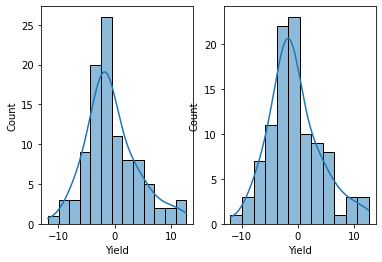

In [ ]:
fig, ax =plt.subplots(1,2)
sns.histplot(y_val-prediction_ridge_val_data, ax=ax[0], kde=True)
sns.histplot(y_val-prediction_lasso_val_data, ax=ax[1], kde=True)
fig.show()

# d) Inference

# Now evaluating the models on the test set
As there was very less amount of difference in the r2 score between the two models, we are going to do the inference on different matrics on both the model rather than selecting just one best performing model.

In [ ]:
pred_ridge_test_data=ridge_regressor.predict(X_test)
pred_lasso_test_data=lasso_regressor.predict(X_test)

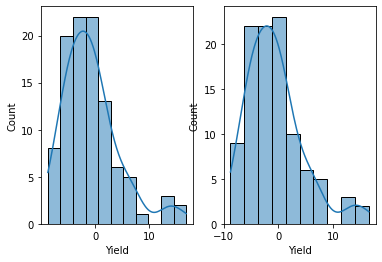

In [ ]:
fig, ax =plt.subplots(1,2)
sns.histplot(y_test-pred_ridge_test_data, ax=ax[0], kde=True)
sns.histplot(y_test-pred_lasso_test_data, ax=ax[1], kde=True)
fig.show()

In [ ]:
eval_data = {'RMSE': [np.sqrt(mean_squared_error(y_test,pred_ridge_test_data)), np.sqrt(mean_squared_error(y_test,pred_lasso_test_data))], 
             'MSE': [mean_squared_error(y_test,pred_ridge_test_data), mean_squared_error(y_test,pred_lasso_test_data)],
             'MAE': [mean_absolute_error(y_test,pred_ridge_test_data), mean_absolute_error(y_test,pred_lasso_test_data)], 
             'R2': [r2_score(y_test, pred_ridge_test_data), r2_score(y_test, pred_lasso_test_data)]}  
eval_data_df = pd.DataFrame(eval_data, index =['Ridge', 'Lasso'])  
print(eval_data_df)

           RMSE        MSE       MAE        R2
Ridge  5.147755  26.499378  3.946303  0.731862
Lasso  5.149696  26.519371  3.950041  0.731660


# e) Feature Importance

ColumnIndex: 0, Feature: Variety, Score: 2.32501
ColumnIndex: 1, Feature: S_1, Score: -2.66646
ColumnIndex: 2, Feature: S_2, Score: -1.83349
ColumnIndex: 3, Feature: S_3, Score: 0.65963
ColumnIndex: 4, Feature: S_4, Score: -4.80030
ColumnIndex: 5, Feature: M_1, Score: -0.95643
ColumnIndex: 6, Feature: M_2, Score: 1.48067
ColumnIndex: 7, Feature: M_3, Score: 1.67835
ColumnIndex: 8, Feature: W_1, Score: -0.19148
ColumnIndex: 9, Feature: W_2, Score: -0.84262
ColumnIndex: 10, Feature: W_3, Score: 0.16745
ColumnIndex: 11, Feature: W_4, Score: -1.82571


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


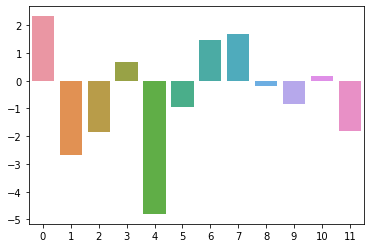

In [ ]:
#Reference source: [5] (MachineLearningMastery, 2020)
# get importance
importance = ridge_regressor.best_estimator_.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('ColumnIndex: {0}, Feature: {1}, Score: {2:.5f}'.format(i, df.columns[i],v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)

### Experimenting by retraining the model on most important features.

In [ ]:
# retraining model keeping important features
y = df['Yield'] #dependant feature
# axis 1 tells python that you want to apply function on columns
X = pd.DataFrame(std.fit_transform(df.drop(['Yield', 'S_1', 'S_3', 'M_1', 'M_2', 'W_3'], axis=1))) # independant features,
X.head

<bound method NDFrame.head of             0         1         2         3         4         5         6
0   -0.982843 -1.459000 -1.075562  0.413672 -1.275092 -0.417242 -0.664647
1   -0.867883 -0.303094 -0.492439  0.194274 -0.591726 -0.231899 -0.989717
2   -0.867883 -0.303094 -1.208727  1.282714 -0.617113  0.162055 -0.990125
3   -0.752922  0.113032 -1.361517  1.016303 -1.296102 -0.329004 -1.106109
4   -0.752922  0.113032 -1.026501  1.228577 -1.333772 -2.465920 -1.107891
..        ...       ...       ...       ...       ...       ...       ...
501 -0.982843  1.176466 -0.418147  0.439316  0.093644  0.078295 -0.803619
502 -0.982843  1.176466 -0.500850 -0.234548  0.095275  0.059744 -0.801766
503 -0.982843  1.176466 -0.983048  0.984960  0.105324  1.246801 -0.800831
504 -0.982843  1.176466 -0.865302  0.725672  0.092352  0.704076 -0.797910
505 -0.982843  1.176466 -0.669058 -0.362767  0.127673  0.355025 -0.799633

[506 rows x 7 columns]>

In [ ]:
#Let us split the data in train, val, test set in 60%, 20%, 20% of the datasets respectively.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(303, 7)
(101, 7)
(102, 7)


In [ ]:
lasso=Lasso()
parameters={'alpha':alphas}
lasso_regressor1=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
# lasso_regressor=GridSearchCV(lasso,parameters)

lasso_regressor1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09,...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lasso_regressor1.best_params_)
print(lasso_regressor1.best_score_)

{'alpha': 0.006609705742330144}
-29.27095316686809


In [ ]:
ridge=Ridge()
parameters={'alpha':alphas}

ridge_regressor1=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
# ridge_regressor=GridSearchCV(ridge,parameters)

ridge_regressor1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor1.best_params_)
print(ridge_regressor1.best_score_)

{'alpha': 4.055654153948428}
-29.223291642303714


In [ ]:
prediction_lasso_val_data=lasso_regressor1.predict(X_val)
prediction_ridge_val_data=ridge_regressor1.predict(X_val)

In [ ]:
print("Lesso r2 - val")
print(r2_score(y_val, prediction_lasso_val_data))

Lesso r2 - val
0.6937418339856365


In [ ]:
print("Ridge r2 - val")
print(r2_score(y_val, prediction_ridge_val_data))

Ridge r2 - val
0.6922876160884177


In [ ]:
pred_ridge_test_data1=ridge_regressor1.predict(X_test)
pred_lasso_test_data1=lasso_regressor1.predict(X_test)

In [ ]:
re_eval_data = {'RMSE': [np.sqrt(mean_squared_error(y_test,pred_ridge_test_data1)), np.sqrt(mean_squared_error(y_test,pred_lasso_test_data1))], 
             'MSE': [mean_squared_error(y_test,pred_ridge_test_data1), mean_squared_error(y_test,pred_lasso_test_data1)],
             'MAE': [mean_absolute_error(y_test,pred_ridge_test_data1), mean_absolute_error(y_test,pred_lasso_test_data1)], 
             'R2': [r2_score(y_test, pred_ridge_test_data1), r2_score(y_test, pred_lasso_test_data1)]}  
re_eval_data = pd.DataFrame(re_eval_data, index =['Ridge', 'Lasso'])  
print(re_eval_data)

           RMSE        MSE       MAE        R2
Ridge  4.812180  23.157077  3.708570  0.687967
Lasso  4.840482  23.430270  3.718935  0.684285


# References
1. Pydata.org. (2021). DataFrame — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/frame.html [Accessed 22 Oct. 2021].

2. Pydata.org. (2012). seaborn.histplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html [Accessed 23 Oct. 2021].

3. scikit-learn. (2021). sklearn.model_selection.train_test_split. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [Accessed 23 Oct. 2021].

4. Smith.edu. (2016). Lab 10 - Ridge Regression and the Lasso in Python. [online] Available at: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html [Accessed 24 Oct. 2021].

5. https://www.facebook.com/MachineLearningMastery (2020). How to Calculate Feature Importance With Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/calculate-feature-importance-with-python/ [Accessed 25 Oct. 2021].

‌
‌
‌


‌